In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

In [2]:
df = pd.read_pickle('/home/omar/drive/hr.pickle')

In [4]:
df.head()

,ts,name,faults
0,"[[0.000167964, -5.34659e-05, 1.28447e-05, 9.03...",9.1120 C Hot Water Pump,"[[BearingFault, motor], [XC, machine], [Bearin..."
1,"[[0.009780156, 0.014624815, 0.019440233, 0.020...",Air RecFan 1.12302,"[[Looseness, machine], [Misalignment, machine]..."
2,"[[0.001560547, 0.001073043, -2.44838e-05, -0.0...",Air RecFan 1.12302,"[[Looseness, machine], [Misalignment, machine]..."
3,"[[-0.002804407, -0.001306111, 0.001502491, 0.0...",Air RecFan 1.12402A,"[[Looseness, machine], [Misalignment, machine]..."
4,"[[0.000500389, 0.00026631, -6.22153e-05, -0.00...",Vacuum Pump 5.1302,"[[Misalignment, machine], [Looseness, machine]..."


In [8]:
df['ts'][0][4]

8192

In [9]:
def calculate_fft(signal):
    signal_hanned = signal * np.hanning(len(signal)) 
    fft_complex = np.fft.fft(signal_hanned)
    # Hanning window requires amplitude of final signal to be magnified
    amplitude_correction = 2
    fft_abs = np.abs(fft_complex) * amplitude_correction
    fft_non_mirrored = fft_abs[: len(fft_abs) // 2] 
    return fft_non_mirrored

def calculate_hilbert(signal):
    hilbert_complex = scp.signal.hilbert(signal)
    hilbert = np.abs(hilbert_complex)
    return hilbert

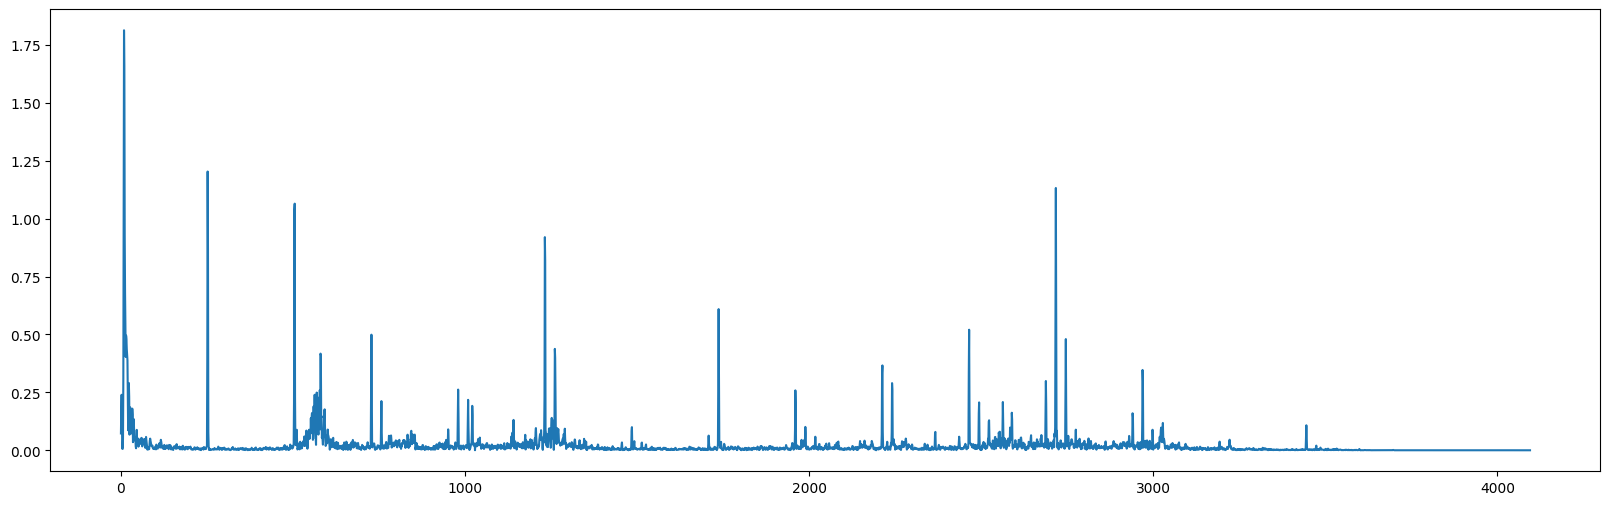

In [45]:
plt.figure(figsize=(20,6))

plt.plot(calculate_fft(df['ts'][0][0]))

In [46]:
len(calculate_fft(df['ts'][0][0]))

4096

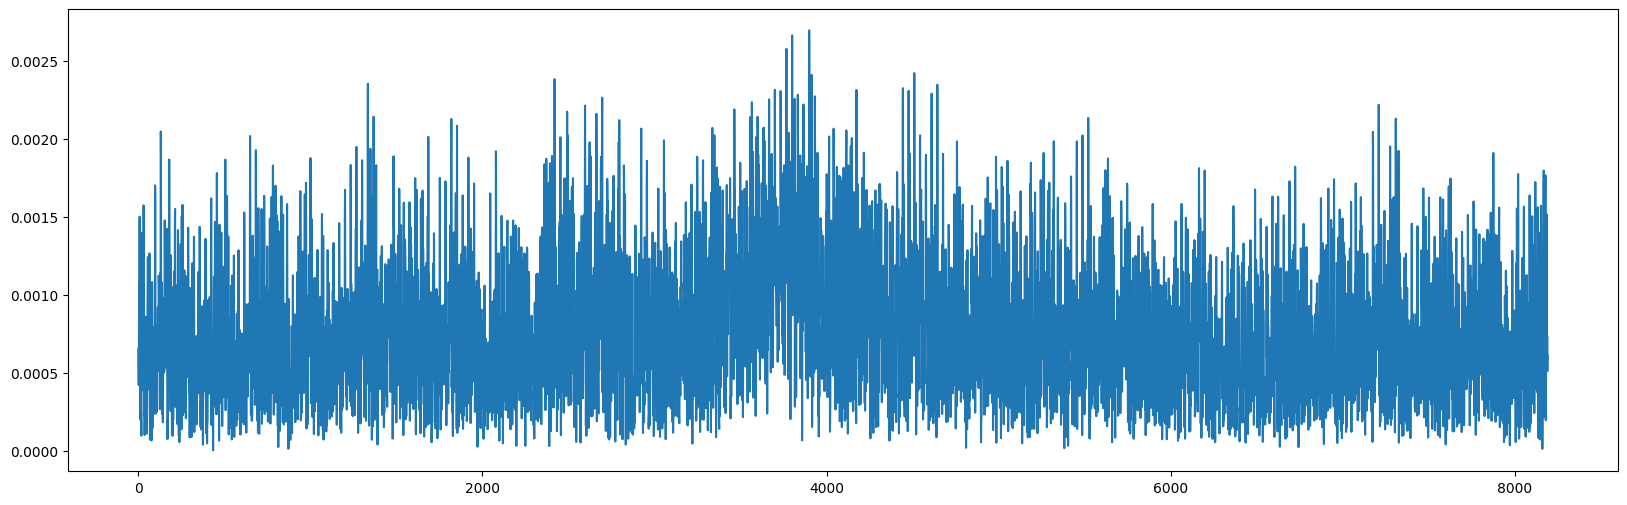

In [41]:
plt.figure(figsize=(20,6))
plt.plot(calculate_hilbert(df['ts'][0][0]))

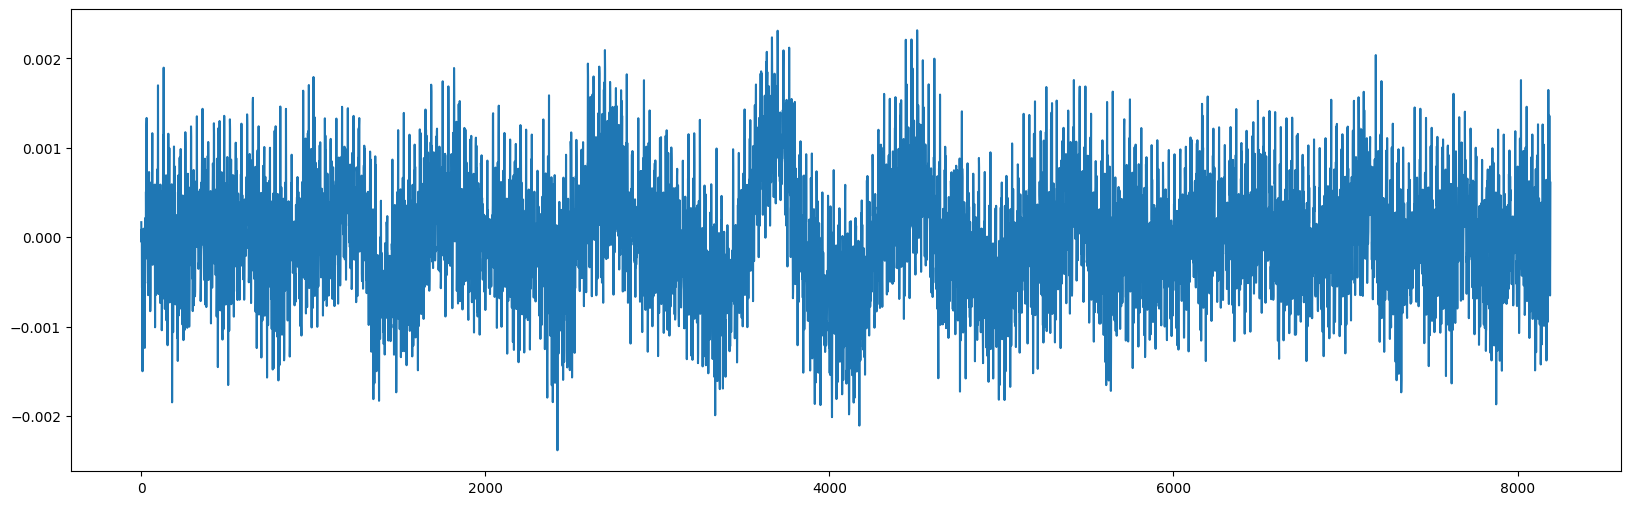

In [42]:
plt.figure(figsize=(20,6))

plt.plot(df['ts'][0][0])